## Домашнее задание 3

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('./Electronic_sales_Sep2023-Sep2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [30]:
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


### Задание 1

In [31]:
df.groupby("Customer ID").agg({
          "Payment Method": lambda x: x.mode().iloc[0] if not x.mode().empty else None,
          "Total Price": "sum",
          "Add-on Total": "sum"
      }).rename(columns={
          "Payment Method": "Preferred Payment Method",
          "Total Price": "Total Spent",
          "Add-on Total": "Add-on Spent"
      }).reset_index()

,Customer ID,Preferred Payment Method,Total Spent,Add-on Spent
0,1000,Credit Card,6279.42,66.30
1,1002,Cash,5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,Debit Card,11779.11,75.33
...,...,...,...,...
12131,19994,Bank Transfer,5504.87,93.17
12132,19995,Credit Card,5394.56,0.00
12133,19996,Bank Transfer,27296.78,432.12
12134,19997,Bank Transfer,2528.26,101.34


### Задание 2

In [41]:
# Доход по каждому методу доставки
res1 = df.groupby("Shipping Type").agg({
          "Total Price": "sum",
      }).rename(columns={"Total Price":"Income"}).reset_index()
res1

,Shipping Type,Income
0,Expedited,12437526.21
1,Express,8685215.62
2,Overnight,8704828.17
3,Same Day,12432024.82
4,Standard,21343073.55


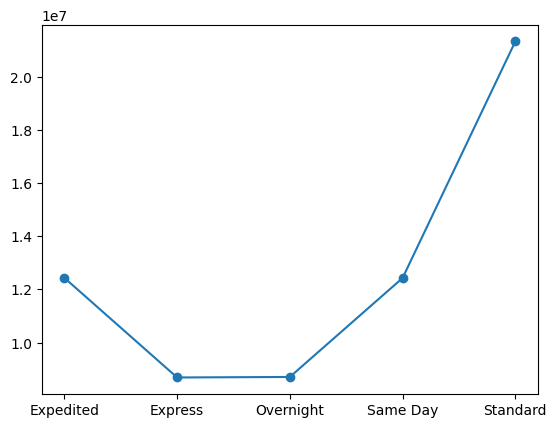

In [44]:
plt.plot(res1["Shipping Type"], res1["Income"], marker='o', linestyle='-', color='tab:blue')

In [47]:
# Доход по каждому типу продукта
res2 = df.groupby("Product Type").agg({
          "Total Price": "sum",
      }).rename(columns={"Total Price":"Income"}).reset_index()
res2

,Product Type,Income
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


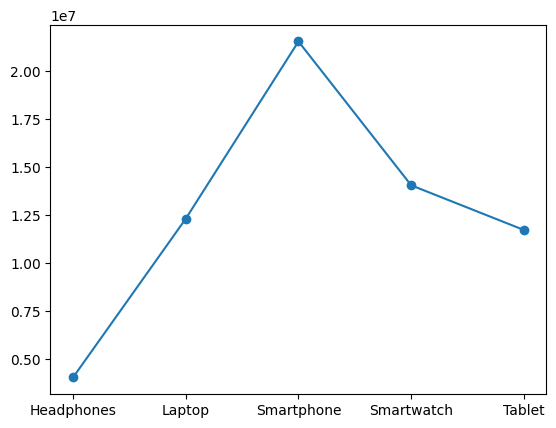

In [48]:
plt.plot(res2["Product Type"], res2["Income"], marker='o', linestyle='-', color='tab:blue')

In [50]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], errors="coerce")

In [51]:
# Доход по дополнительным услугам за каждый месяц
res3 = df.groupby(df["Purchase Date"].dt.to_period("M"))["Add-on Total"].sum().reset_index().rename(
    columns={"Purchase Date": "Month", "Add-on Total": "Add-on Income"}
    )
res3

,Month,Add-on Income
0,2023-09,8012.62
1,2023-10,37837.12
2,2023-11,34888.81
3,2023-12,33509.15
4,2024-01,136195.16
5,2024-02,120148.92
6,2024-03,124954.26
7,2024-04,123973.59
8,2024-05,132018.51
9,2024-06,126689.59


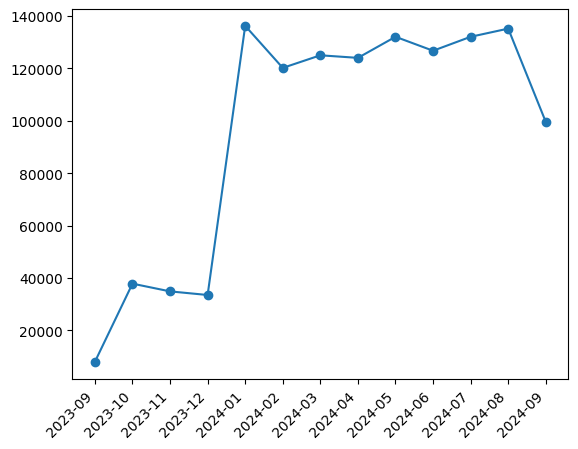

In [59]:
plt.xticks(rotation=45, ha="right")
plt.plot(res3["Month"].astype(str), res3["Add-on Income"], marker='o', linestyle='-', color='tab:blue')

In [60]:
# Доход по дополнительным услугам за каждый квартал
res4 = df.groupby(df["Purchase Date"].dt.to_period("Q"))["Add-on Total"].sum().reset_index().rename(
    columns={"Purchase Date": "Quarter", "Add-on Total": "Add-on Income"}
    )
res4

,Quarter,Add-on Income
0,2023Q3,8012.62
1,2023Q4,106235.08
2,2024Q1,381298.34
3,2024Q2,382681.69
4,2024Q3,366669.23


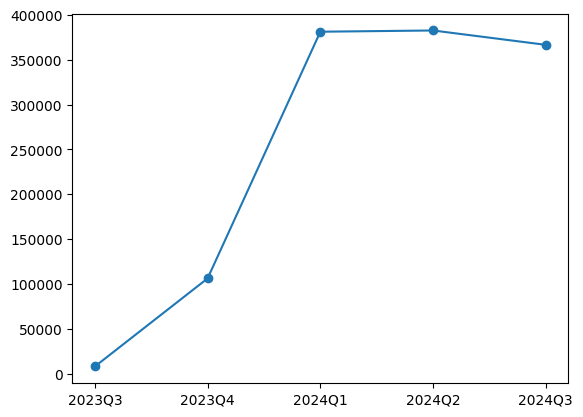

In [61]:
plt.plot(res4["Quarter"].astype(str), res4["Add-on Income"], marker='o', linestyle='-', color='tab:blue')